2018-10-21 22:21:07.824606


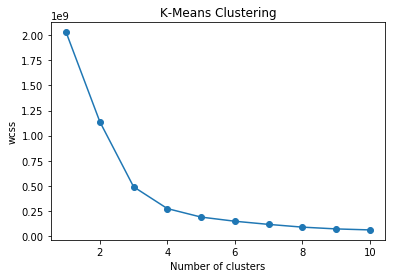

2018-10-21 22:21:54.629579


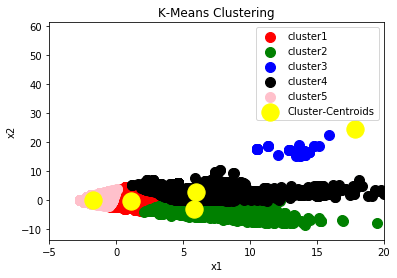

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


dataset = pd.read_csv('sample.txt',sep =",",header=None)
x1= dataset.iloc[:,1:23].values

import datetime 
s = datetime.datetime.now()
print(s)

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10)
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.scatter(range(1,11),wcss)
plt.plot(range(1,11),wcss)
plt.title('K-Means Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x1)

from sklearn.decomposition import PCA
pca = PCA(n_components =2)
x = pca.fit_transform(x)
explained_variance = pca.explained_variance_ratio_

kmeans = KMeans(n_clusters=5,n_init=100, max_iter=3000, tol=0.0001, precompute_distances='auto', verbose=0)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

s1 = datetime.datetime.now()
print(s1)

plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c="red",label="cluster1")
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c="green",label="cluster2")
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c="blue",label="cluster3")
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=100,c="black",label="cluster4")
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=100,c="pink",label="cluster5")
# plt.scatter(x[y_kmeans==5,0],x[y_kmeans==5,1],s=100,c="purple",label="cluster6")

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c="yellow",label="Cluster-Centroids")


plt.title('K-Means Clustering')
plt.xlabel('x1')
plt.xlim(-5,20)
# plt.ylim(-9,10)
plt.ylabel('x2')
plt.legend()
plt.show()

In [42]:
from sklearn.metrics import davies_bouldin_score
z = davies_bouldin_score(x, y_kmeans)
from sklearn.metrics import silhouette_score
z = silhouette_score(x,y_kmeans)
z

0.46109219094476156